<h2> Black-Scholes Model </h2>

There are at least to different approaches to arrive at this model. One is by getting a partial differential  equation for the price of an option and the other is by the Martingale Representation Theorem (pricing under Risk-Neutral Measure)  which gives us directly the value of the option with no need of solving a PDE. The price of the latter approach is that the value of the option is expressed as a conditional expectation which is sometimes more difficult to compute/estimate than a PDE. Also, the Martingale setting allows us to arrive to a formula for the value of an option whose payoff at maturity time could be path-dependent and whose underlying asset follows a Generalized Brownian Motion, that is, the stock price has non constant mean return and volatility processes.

<h3> Some Ito Calculus. </h3>
First let us recall some definitions and formulas:

1. <strong> Ito Process </strong>. Is a stochastic process $\{X(t)\}$ of the form:

$$
\begin{align}
X(t) = X(0) + \int_0^t \Delta(s)dW(s) + \int_0^t\Theta(s)ds
\end{align}
$$

with $X(0)$ non random and $\{\Delta(t)\},~\{\Theta(t)\}$ stochastic process adapted to the filtration $\mathcal{F}_t$ induce by the Brownian motion $\{W(t)\}$ and such that 
$$
\mathbb{E}[\int_0^t\Delta^2(s)ds], ~~ \int_0^t|\Theta(s)|ds <\infty
$$

The formula above for $X(t)$ is equivalent to

$$
dX(t) = \Theta(t)dt +\Delta(t)dW(t).
$$



2. <strong> Ito Formula</strong>. Let $\{X(t)\}$ be an Ito process and $f:\mathbb{R}^2 \to \mathbb{R}$ be a $C^2$ function. Then for all $t>0$

$$
d(f(t, X(t))) = f_t(t, X(t))dt + f_x(t, X(t))dX(t) + \frac{1}{2}f_{xx}(t X(t))dX(t)dX(t) 
$$

where $f_t, ~f_x, ~f_{xx}$ denote partial derivatives of the function $f$ with respect to the firs and second variable. Aslo to compute $dX(t)dX(t)$ we use "the rules":

$$
dt*dt = dt*dW(t) =0\qquad \text{and }\quad dW(t)dW(t) = dt.
$$

3. <strong>Stochastic Differential Equation (SDE).</strong> An SDE is an equation of the form:
$$
dX(t) = \beta(t, X(t))dt + \gamma(t, X(t))dW(t)
$$

where $\beta$ and $\gamma$ are random processes called the <em> drift</em> and <em>difussion</em> respectively. In adition to this equation, an initial condition of the form $X(t_0)=x$ is especified. The problem is then to find a stochastic process $\{X(t)~~t\geq t_0\}$ such that:

$$
\begin{align*}
X(t_0) =& x\\
X(t) =& X(t_0) + \int_{t_0}^t\beta(u, X(u))du + \int_{t_0}^t\gamma(u, X(u))dW(u)
\end{align*}
$$

The paradigmatic example in this notebook is the <em>Geometric Brownian Motion.</em>

<strong>Geometric Brownian Motion</strong>. Is a process of the form:
$$
dX(t) = X(t)(\mu dt + \sigma dW(t))
$$

The solution of the above SDE is

$$
X(t) = X(0)\exp\left[(\mu - \frac{1}{2} \sigma^2)t + \sigma W(t)\right]
$$

the Generalized Geometric Brownian Motion is one with $\mu$ and $\sigma$ non constant adapted processes:

$$
dX(t) = X(t)(\mu(t) dt + \sigma(t) dW(t))
$$

The solution of the above SDE is

$$
X(t) = X(0)\exp\left[\int_0^t(\mu(s) - \frac{1}{2} \sigma(s)^2)ds + \int_0^t\sigma(s) dW(s)\right]
$$


<h3> Black-Scholes Equation. </h3>

Consider a stock whose price $S(t)$ is a Geometric Brownian motion

$$
dS(t) = S(t)(\mu dt + \sigma dW(t))
$$
and a European call option on this asset, that is, the payoff of this option is $V(T) = (S(T) - K)^{+}$, where $T$ is the maturity and $K$ is the strike.

As in the binomial model above, the goal is to price this derivative security. To do this we need to determine the initial capital $X(0)$ and a portfolio process $\Delta(t)$ (the amount of shares of the asset at time $t$) to perfectly hedge a short position on this option. This hedging portfolio will satisfy $X(t) = V(t)~~\forall t\in[0, T]$ with probability 1, where $V(t)$ represents the value of the option at time $t$. Then the value of this option, $V(0)$, is the initial capital  $X(0)$.

Black and Scholes argued that the value $V(t)$ of the option at any time $t$ should only depend on the time (or time to expiration to be more precise) and the value of the stock at that time and of course on the parameters of the model ($\sigma, r, K$). Let us denote the value of the option as the function $c(t, x)$ where $S(t)=x$. The goal is therefore determine the functional form of $c$. The evolution of the stochastic process $c(t, S(t))$ can be computed by means of the Ito formula:

$$
\begin{align*}
d(c(t, S(t))) =& c_t(t, S(t))dt + c_x(t, S(t))dS(t) + \frac{1}{2}c_{xx}(t, S(t))dS(s)dS(t)\\
= & \left(c_t(t, S(t))dt + \mu c_x(t, S(t))S(t) + \frac{1}{2}c_{xx}(t, S(t))\sigma^2 S(s)^2\right)dt + c_x(t, S(t))\sigma S(t)dW_t
\end{align*}
$$

The (short option) hedging portfolio is made out of a long position in the asset and a money market with interest rate $r$.  At time $t$ the agent holds $\Delta(t)$ shares of the asset and the remainder of the portfolio, $X(t)-\Delta(t)S(t)$  is invested in the money market, therefore the evolution of $X$ is:

$$
\begin{align*}
dX(t) =& \Delta(t)dS(t) + r(X(t) - \Delta(t)S(t))dt \\
=& \Delta(t)(\mu S(t) dt +\sigma S(t)dW(t)) + r(X(t) - \Delta(t)S(t))dt \\
=& rX(t) +(\mu -r)\Delta(t)S(t)dt + \sigma\Delta(t)S(t)dW(t).
\end{align*}
$$

One way to guarantee the equality of both prices is by making:

$$
d(X(t)) = d(c(t, S(t))) \qquad \text{and }\quad X(0) = c(0, S(0)).
$$

For if $d(X(t)) = d(c(t, S(t)))$ then:

$$
X(t) -X(0) = c(t,S(t)) - c(0, S(0))
$$
and since $X(0) = c(0, S(0))$ we get the desired equality $X(t) =c(t, S(t))$. Therefore

$$
rX(t)dt +(\mu -r)\Delta(t)S(t)dt + \sigma\Delta(t)S(t)dW(t) = \left(c_t(t, S(t))dt + \mu c_x(t, S(t))S(t) + \frac{1}{2}c_{xx}(t, S(t))\sigma^2 S(s)^2\right)dt + c_x(t, S(t))\sigma S(t)dW_t
$$

If we define the hedging process $\Delta(t)$ such that:

$$
\begin{equation}
\sigma\Delta(t)S(t) = c_x(t, S(t))\sigma S(t) \qquad \text{Hedging rule}
\end{equation}
$$

Then, the difference portfolio $X(t) - c(t,S(t))$ is risk free (since the uncertainty from the Brownian motion is gone), then this portfolio grows at rate $r$ and thus:

$$
\begin{align*}
d(X(t) - c(t,S(t))) =& rX(t)dt +(\mu -r)\Delta(t)S(t)dt -\left(c_t(t, S(t))dt + \mu c_x(t, S(t))S(t) + \frac{1}{2}c_{xx}(t, S(t))\sigma^2 S(s)^2\right)dt \\
=& r(X(t) - c(t,S(t)))dt 
\end{align*}
$$

From the second equality above and replacing the formula for $\Delta_t$ it follows that:

$$

$$













$$
c_t(t, S(t)) +rc_x(t,S(t))S(t) +\frac{1}{2}c_{xx}(t,S(t))\sigma^2 S(t)^2 - rc(t,S(t)) = 0
$$

That is, the function $c(t,x)$ satisfies the partial differential equation with terminal condition:

$$
\begin{cases}
& c_t(t, x) +rxc_x(t,x) +\frac{1}{2}\sigma^2 x^2c_{xx}(t,x) - rc(t,x) = 0, \quad \forall t\in[0,T)\\

& c(T,x) = (x-K)^{+}
\end{cases}
$$

This is known as the Blac-Scholes Merton equation.
Suppose we have found this function. If an investor starts with inital capital $X(0) =c(0,S(0))$ and uses the hedge $\Delta(t)=c_x(t,S(t))$, then $X(t) =c(t,S(t))$ for all $t\in[0, T)$. Now, taking the limit $t\uparrow T$ and using the continuity of $X$ and $c$ one can conclude that $X(T) = c(T, S(T))=(S(T)-K)^{+}$. This means that the short postion has been successfully hedge. No matter what path the stock price follows, at expiration date the agent hedging the short position has a portfolio whose value agrees with the derivative security payoff.
By the use of some methods from partial differential equations it is possible to arrive at a closed form of the solution of BS. In the next section we will arrive to the same expression for the price of the option by means of the Risk Neutral Measure. 

The solution of BS is:

$$
c(t,x) = x\Phi(d_{+}(T-t, x)) - Ke^{-r(T-t)}\Phi(d_{-}(T-t, x)), \quad t\in [0, T), \quad x>0
$$

with
$$
d_{\pm}(u, x) = \frac{1}{\sigma\sqrt{u}}\left[\log\frac{x}{K} +\left(r\pm\frac{1}{2}\sigma^2\right)u\right]
$$

and $\Phi$ the cummulative distribution function of a standard normal random variable.


<h3> Value Portfolio process under the Risk-Neutral Measure. </h3>

In this section we will arrive at a formula for the price of an option whose payoff at maturity time $T$ is some function $V(T)$. As a particular case of this formula we get the function $c(t,x)$ obtained above for the price of an European call option whose underlying asset price is a geometric brownian motion (The Black-Scholes model).

<h3> Risk-Neutral Measure </h3>

Recall that given a probability space $(\Omega, \mathcal{F}, \mathbb{P})$ and a non-negative random variable $Z$ with mean one, one can define a new probability measure $\widetilde{\mathbb{P}}$ on $(\Omega,\mathcal{F},\mathbb{P})$ by the formula

$$
\widetilde{\mathbb{P}}(A)=\int_A Z(\omega)d\mathbb{P}(w) \quad \forall A\in \mathcal{F}.
$$

Then, for any random variable we will denote by $\mathbb{E}(X)$ and $\widetilde{\mathbb{E}}(X)$ its expectation with respect to the measures $\mathbb{P}$ and $\widetilde{\mathbb{P}}$ respectively. These two expectations are related by the formula $\widetilde{\mathbb{E}}(X)=\mathbb{E}(XZ)$.

This relation follows by a standard machine proof; prove it first for indicators then for simple functions and finally for more general measurable functions.

Also if $\mathbb{P}(Z>0)=1$ then $\widetilde{\mathbb{E}}\left(\frac{X}{Z}\right)=\mathbb{E}(X)$. Furthermore, in this case both probability measures are equivalent, meaning that both agree on the probability one events.

The random variable $Z$ is called the Radon-Nikodym derivative of $\widetilde{\mathbb{P}}$ with respect to $\mathbb{P}$.

<h4>Example</h4>

As an example, consider $Y$ a standard normal random variable on a probability space $(\Omega, \mathcal{F}, \mathbb{P})$ and $\theta$ a constant and define 

$$
Z = \exp\left(-\theta Y-\frac{1}{2}\theta^2\right)
$$

Then, under the probability measure $\widetilde{\mathbb{P}}$ defined by $Z$, the random variable $X = Y+\theta$ is a standard normal. In fact:

$$
\begin{align*}
\widetilde{\mathbb{P}}(X\leq x) =& \widetilde{\mathbb{P}}(Y\leq x -\theta) = \int_{-\infty}^{x-\theta}Zf_Y(y)dy \\
= & \frac{1}{\sqrt{2\pi}}\int_{-\infty}^{x-\theta}\exp\left(-\theta y-\frac{1}{2}\theta^2\right)\exp\left(-\frac{1}{2}y^2\right)dy\\
= & \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{x-\theta}\exp\left(-\frac{1}{2}(y+\theta)^2\right)dy\\
= & \frac{1}{\sqrt{2\pi}}\int_{-\infty}^{x}\exp\left(-\frac{1}{2}y^2\right)dy
\end{align*}
$$

which is precisely the cummulative distribution of a standard normal random variable.



For the risk-neutral measure we perform a similar change of measure.

<strong> Girsanov one dimensional Theorem.</strong> Let $W(t)$ for $t\in[0, T]$ be a Brownian motion on $(\Omega, \mathcal{F},\mathbb{P})$ and let $\{\mathcal{F}(t), ~~ t\in [0, T]\}$ be a filtration for this Brownian motion, meaninig that $W(t)$ is $\mathcal{F}(t)-$measurable and $W(t)-W(s)$ is independent of $\mathcal{F}(s)$ for all $s, t\in[0, T]$ and $s< t$. Let $\Theta(t)$ be an adapted process and define

$$
Z(t) = \exp\left(-\int_0^t\theta(u)dW(u) - \frac{1}{2}\int_0^t\theta^2(u)du\right), \qquad \text{such that }\quad \mathbb{E}\int_0^T\Theta^2(u)Z^2(u)du < \infty,
$$

$$
\widetilde{W}(t) = W(t) +\int_0^t\Theta(u)du.
$$

Then, $\mathbb{E}(Z(T) )= 1$ and under the probability measure $\widetilde{\mathbb{P}}$ defined by $Z = Z(T)$ the process $\widetilde{W}$ is a Brownian motion.



<h4> Stock Under Risk-Neutral Measure. </h4>

Next, given a Brownian motion in a probability space and an asset whose price is a Geometric Brownian motion we will define an adapted process $\Theta$ which in turn will allow us to define a Radon-Nikodym process $Z(t)$, $t\in[0,T]$, as in Girsanov's Theorem such that under the new probability measure $\widetilde{\mathbb{P}}$ defined by $Z=Z(T)$ the discounted (according to a rate interest model) stock price is a Martingale process.

Recall that given a stochastic process $X$ on a probability space $(\Omega, \mathcal{F}, \mathbb{P})$ with a filtration $\{\mathcal{F}(t), ~~ t\in [0,T]\}$, $X$ is said to be a Martingale process with respect to this filtration if it is adapted to it and 

$$
\mathbb{E}(X(t) \vert \mathcal{F}(s)) = X(s) \quad \forall s\leq t.
$$

Examples of Martingale processes are Ito integrals, i.e, a process of the form:

$$
X(t) = \int_0^t \Theta(u)dW(u)
$$
provided that $\mathbb{E}\int_0^t\Theta^2(u)du < \infty$.

Consider the stock price

$$
dS(t) = \mu(t)S(t)dt + \sigma(t)S(t)dW(t),\qquad t\in[0, T]
$$

and suppose we have an adapted interest rate process $R(t)$, them the discount process is $D(t) = \exp(-\int_0^t R(s)ds)$ whose rate of grow is $-R(t)$, due to the fact that $dD(t) = -R(t)D(t)dt$.

Now consider the discounted stock price process:

$$
D(t)S(t) = S(0) \exp\left[ \int_0^t\sigma(s)dW(s) + \int_0^t\left(\mu(s)-R(s)-\frac{1}{2}\sigma^2(s)\right) ds\right]
$$


with evolution

$$
\begin{align*}
d(D(t)S(t)) = & (\mu(t) - R(t))D(t)S(t)dt + \sigma(t)D(t)dS(t)dW(t)\\
=& \sigma(t)D(t)dS(t)(\Theta(t)dt + dW(t))
\end{align*}
$$

where $\Theta(t) = \frac{\mu(t)-R(t)}{\sigma(t)}$ is called the <em>market price of risk</em>.

Note that the discounted stock price has the same voltatility while the mean rate of return is $\mu(t)-R(t)$. 

Now, via the process $\Theta$ defined above we introduce the probability measure $\widetilde{\mathbb{P}}$ and the new Brownian motion $\widetilde{W}(t) = W(t) +\int_0^t \Theta(u)du$, then the discounted stock price evolution in terms of this Brownian motion is:
$$
d(D(t)S(t)) = \sigma(t)D(t)S(t)d\widetilde{W}(t)
$$

which is equivalent to 
$$
D(t)S(t) = S(0) + \int_0^t\sigma(u)D(u)S(u)d\widetilde{W}(u).
$$

Since under the new measure $\widetilde{\mathbb{P}}$ the process $\int_0^t\sigma(u)D(u)S(u)d\widetilde{W}(u)$ is an Ito integral, it is then a Martingale process and so it is the discounted stock price.


<strong> Remark: </strong>  Note that under the measure $\widetilde{\mathbb{P}}$ the mean rate or return of the stock price is simply the interest rate. This follows by replacing the Brownian $W$ in the evolution of $S(t)$ by $dW(t)= d\tilde W(t) - \Theta(t)dt$:

$$
\begin{align*}
dS(t) =& S(t)(\mu(t) dt + \sigma(t)dW(t))\\
= & S(t)\mu(t)dt + \sigma(t)S(t)(d\widetilde{W}(t) - \Theta(t)dt) \\
=& S(t)(\mu(t) -\sigma(t)\Theta(t))dt + S(t)\sigma(t)d\widetilde{W}(t)\\
=& S(t)R(t)dt + S(t)\sigma(t)d\widetilde{W}(t)
\end{align*}
$$

<strong>Definition</strong> Given a probability space $(\Omega, \mathcal{F}, \mathbb{P})$, a new measure $\widetilde{\mathbb{P}}$ is called a <em>risk-neutral measure</em> if it is equivalent to the measure ${\mathbb{P}}$ and under this new measure every discounted portfolio is a Martingale.



Now, since $\mathbb{E}Z(T) = 1$ the measure $\widetilde{\mathbb{P}}$ is equivalent to $\mathbb{P}$ and also by the remark above the definition, under this new measure every discounted portfolio is a Martingale. 
In fact, consider an agent that at time $t$ holds $\Delta(t)$ shares of stock  and the rest of its capital in the money market with interest rate model $R(t)$, then discounted portfolio price evolution is:

$$
\begin{align*}
d(D(t)X(t)) =& -R(t)D(t)X(t)dt + D(t)dX(t) \\
=& -R(t)D(t)X(t)dt + D(t)(R(t)X(t) +(\mu(t) -R(t))\Delta(t)S(t)dt + \sigma(t)\Delta(t)S(t)dW(t))\\
=& ~~~D(t)\Delta(t)\left((\mu(t) -R(t))S(t)dt+ \sigma(t) S(t)dW(t)\right)\\
=& ~~~\sigma(t)\Delta(t)D(t)S(t)\left(\Theta(t)dt+ dW(t)\right)\\
=& ~~~\sigma(t)\Delta(t)D(t)S(t)d\widetilde{W(t)}
\end{align*}
$$

Therefore this portfolio is also a Martingale process under the risk-neutral measure $\widetilde{\mathbb{P}}$.

<h4> Pricing under the risk-neutral measure </h4>

The objective of this section is to arrive to a general formula for the price of an option whose payoff at maturity time $T$ is $V(T)$, an $\mathcal{F}(T)$-measurale random variable. This latter condition means that the payoff is allow to be path-dependent. We wish to know the initial capital $X(0)$ and a portfolio process $\Delta(t)$ for $t\in[0, T]$ an agent would need in order to hedge a short positioin in the given option, i.e, in order to have
$$
X(T) = V(T) \qquad\text{with probability one}.
$$

Suppose there exists such a portfolio $X$, then under the measure $\widetilde{\mathbb{P}}$ its discounted price is a martingale and therefore:

$$
D(t)X(t) = \widetilde{\mathbb{E}}(D(T)X(T) \vert \mathcal{F}(t)) = \widetilde{\mathbb{E}}(D(T)V(T) \vert \mathcal{F}(t)).
$$

Then if we define the price of the option at time $t$, $V(t)$ by:
$$
D(t)V(t) = \widetilde{\mathbb{E}}(D(T)V(T) \vert \mathcal{F}(t)),\qquad \forall i\in[0,T]
$$

then the price of the option at time t is:

$$\begin{align*}
V(t) = &\frac{1}{D(t)}\widetilde{\mathbb{E}}(D(T)V(T) \vert \mathcal{F}(t))\\
= &\widetilde{\mathbb{E}}(D(T-t)V(T) \vert \mathcal{F}(t)) \\
=& \widetilde{\mathbb{E}}\left[\exp\left(-\int_t^TR(u)du\right)V(T) \bigg| \mathcal{F}(t)\right]  \qquad \forall t\in[0,T]
\end{align*}
$$

where in the second to last equality we have used the <em>taking out what is known</em> property of the conditional expectation.

Finally, the initial capital is 

$$
X(0) = V(0) = \widetilde{\mathbb{E}}\left[D(T)V(T) \bigg| \mathcal{F}(0)\right] = \widetilde{\mathbb{E}}\left[D(T)V(T)\right]
$$

and $V(0)$ is by no arbitrage the value of the option.


<strong> Example (Eurpean Call option)</strong>
In this case $V(T) = (S(T)-K)^{+}$ where $S$ follows a geometric Brownian motion (this means both mean rate of return and volatility are constant) and the interest rate model is just the constant $r$ (the money grows at a constant rate $r$). Then the value of the option at time $t$ is:
$$
V(t) = \widetilde{\mathbb{E}}\left[e^{-r(T-t)}(S(T) - K)^{+} \bigg| \mathcal{F}(t)\right]
$$

To compute this conditional expectation recall that 
$$
S(t) = S(0)\exp\left(\sigma\widetilde{W}(t) + (r-\frac{1}{2}\sigma^2)t\right)  
$$

then at time $T$ from time $t$:

$$
\begin{align*}
S(T) =& S(t)\exp\left(\sigma(\widetilde{W}(T) -\widetilde{W}(t)) + (r-\frac{1}{2}\sigma^2)(T-t)\right)  \\
= & S(t)\exp\left(\sigma\sqrt{\tau}Y + (r-\frac{1}{2}\sigma^2)\tau\right)
\end{align*}
$$

where $Y = \frac{\widetilde{W}(T) -\widetilde{W}(t)}{\sqrt{\tau}}$,  $\tau = T-t$ and $Y\sim \mathcal{N}(0,1)$, therefore, $S(T)$ is the product of an $\mathcal{F}(t)$-measurable random variable $S(t)$ and the log normal random variable

$$
\exp\left(\sigma\sqrt{\tau}Y + (r-\frac{1}{2}\sigma^2)\tau\right)
$$

which is independent from $\mathcal{F}(t)$. Thus, by the <em>Independence Lemma</em> property of conditional expectation:

$$
\begin{align*}
\widetilde{\mathbb{E}}\left[e^{-r\tau}(S(T) - K)^{+} \bigg| \mathcal{F}(t)\right] =& \widetilde{\mathbb{E}}\left[e^{-r\tau}\left\{x\exp\left(\sigma\sqrt{\tau}Y + (r-\frac{1}{2}\sigma^2)\tau\right) - K\right\}^{+}\right] \\
= & \frac{1}{\sqrt{2\pi}}\int_{-\infty}^{\infty}e^{-r\tau}\left\{x\exp\left(\sigma\sqrt{\tau}y + (r-\frac{1}{2}\sigma^2)\tau\right) - K\right\}^{+}e^{-1/2y^2}dy,\\
\end{align*}
$$
where $x $ is the value of the stock at time $t$, that is, $x=S(t)$.

Now, 

$$
\left\{x\exp\left(\sigma\sqrt{\tau}y + (r-\frac{1}{2}\sigma^2)\tau\right) - K\right\}^{+}
$$
if and only if

$$
x\exp\left(\sigma\sqrt{\tau}y + (r-\frac{1}{2}\sigma^2)\tau\right) - K >0
$$

if and only if

$$
y >-d_{-}:=\frac{1}{\sigma\sqrt{\tau}}\left( -\log\frac{x}{K} - (r-\frac{1}{2}\sigma^2)\tau\right)
$$

thence, the conditional expectation is:

$$\begin{align*}
\widetilde{\mathbb{E}}\left[e^{-r\tau}(S(T) - K)^{+} \bigg| \mathcal{F}(t)\right]= & \frac{1}{\sqrt{2\pi}}\int_{-d_{-}}^{+\infty} x\exp\left(\sigma\sqrt{\tau}y + (r-\frac{1}{2}\sigma^2)\tau -r\tau -\frac{1}{2}y^2\right)dy - \frac{1}{\sqrt{2\pi}}e^{-r\tau}\int_{-d_{-}}^{+\infty}Ke^{-1/2y^2}dy\\
= & \frac{1}{\sqrt{2\pi}}\int_{-d_{-}}^{+\infty} x\exp\left(-\frac{1}{2}(y -\sigma\sqrt{\tau})^2\right)dy - Ke^{-r\tau}\Phi(d_{-})\\
= & \frac{1}{\sqrt{2\pi}}\int_{-d_{-} -\sigma\sqrt{\tau}}^{+\infty} x\exp\left(-\frac{1}{2}y^2\right)dy - Ke^{-r\tau}\Phi(d_{-})\\
= & x\Phi(d_{+}) - Ke^{-r\tau}\Phi(d_{-})
\end{align*}
$$

where $d_{+}:= d_{-} + \sigma\sqrt{\tau} = \frac{1}{\sigma\sqrt{\tau}}\left( \log\frac{x}{K} + (r+\frac{1}{2}\sigma^2)\tau\right)$ and $\Phi$ is the cummulative distribution of a standard normal.  Thus, we have arrived to the expression for the value of the derivative security we have claimed was the solution for B-S equation in the previous section. 





Now, we get the function $V(t)$ under the assumption that such portfolio price $X$ exists, but how can we guarantee the existence of this process $X$?. For starters, the meaning of its existence is that we are able to define the initial capital $X(0)$ and the portfolio process $\Delta(t)$ for all $t\in [0, T]$.

Recall that the existence of the portfolio $X$ means that the derivative security can be hedged. This motivates the following definition:

<strong>Definition of Completeness </strong>. A market model is said to be complete if every derivative security can be hedged.

A way of showing that for a given option there exists the hedging portfolio is by means of the <em>Martingale Representation Theorem</em>. Rougly speaking, this theorem asserts that when the filtration is the one generated by the Brownian motion, meaning that the only information in $\mathcal{F}(t)$ is that obtained from observing the Brownian motion up to time $t$, the every martingale process (with respect to this filtration) is simply an initial condition plus an Ito integral (with respect to the given Brownian motion). In other words, the only source of uncertainty in the model is the one coming from the Browinian and thence there is only one source of uncertainty to be removed by hedging.


<strong>Theorem (Martingale representation)</strong>. Let $W(t)$, $t\in[0,T]$, be a Brownian motion on a space $(\Omega, \mathcal{F}, \mathbb{P})$ and let $\mathcal{F}(t)$ be a filtration generated by this Browian motion. Let $M(t)$ be a martingale process with respect to this filtration. Then, there exists an adapted process $\Gamma(u)$, $u\in[0,T]$, such that

$$
M(t) = M(0) +\int_0^t\Gamma(u)dW(u), \quad t\in[0,T].
$$

As a corollary of this an Girsanov's Theorem we have a representation theorem under a risk-neutral measure.

<strong> Corollary </strong>. Let $W(t)$ and $\mathcal{F}(t)$ as in the previous theorem and $\Theta(t)$ an adapted process such that $\mathbb{E}\int_0^t\Theta^2(u)du < \infty$, and difine the Radon-Nikodym derivative process as in Girsanov's:

$$
Z(t) = \exp\left(-\int_0^t\Theta(u)dW(u) - \frac{1}{2}\int_0^t \Theta^2(y)du\right)  \quad t\in[0,T]
$$

$$
\widetilde{W}(t)=W(t) +\int_0^t\Theta(u)du, \quad t\in[0,T].
$$

Then $\mathbb{E}(Z(T))=1$ and under the probability measure $\widetilde{\mathbb{P}}$ defined by the random variable $Z=Z(T)$, the process $\widetilde{W}$ is a Brownian motion. Furthermore, if $\tilde{M}$ is a Martingale process under the measure $\widetilde{\mathbb{P}}$ with respect to the filtration $\mathcal{F}(t)$, then there exists an adapted process $\tilde{\Gamma}$ such that

$$
\widetilde{M}(t) = \widetilde{M}(0) + \int_0^t\widetilde{\Gamma}(u)d\widetilde{W}(u), \quad \forall t\in[0, T].
$$

Now, with the previous results we are able to show that a hedging portfolio can be defined. In fact, recall that the pay off of the option, $V(T)$, is assumed to be an $\mathcal{F}(T)$-measurable random variable, and we define the $\mathcal{F}(t)$- process, discounted at time $t$, by:

$$
D(t)V(t) = \widetilde{\mathbb{E}}[D(T)V(T) \vert \mathcal{F}(t)]
$$

This process is in fact a Martingale process under the measure $\widetilde{\mathbb{P}}$:

$$
\begin{align*}
\widetilde{\mathbb{E}}[D(t)V(t) \vert \mathcal{F}(s)] =& \widetilde{\mathbb{E}}[\widetilde{\mathbb{E}}[D(T)V(T) \vert \mathcal{F}(t)] \vert \mathcal{F}(s)] \\
=& \widetilde{\mathbb{E}}[D(T)V(T) \vert \mathcal{F}(s)]\\
=& D(s)V(s)
\end{align*}
$$

Then by the previous Corollary, there exists an adapted process $\widetilde\Gamma$ such that:

$$
D(t)V(t) = D(0)V(0) + \int_0^t\tilde\Gamma(u)d\tilde{W}(u), \quad t\in[0, T]
$$

but, on the other hand, if such protfolio $X$ existed, then it will satisfy:

$$
D(t)X(t) = D(0)X(0) + \int_0^t\Delta(u)\sigma(u)D(u)S(u)d\tilde{W}(u), \quad t\in[0, T]
$$

So, in order to have $X(t)=V(t)$ for all $t\in[0,T]$ we should choose

$$
X(0) = V(0)  
$$

initial capital is precisely the price of the option at time $0$, and the hedging rule:

$$
\Delta(t) = \frac{\tilde{\Gamma}(t)}{\sigma(t)D(t)S(t)}, \quad \forall t\in[0, T],
$$

provided that the volatility $\sigma(t)$ is, with probability one, positive. 

Note that the Martingale Representation Theorem is a theoretical tool to justify the risk-neutral pricing formula for $V(t)$. However, it does not provide a practical method for finding the hedging portfolio due to the fact that the hedging rule involves the process $\tilde{\Gamma}(t)$ whose existence is assured by the Theorem, but its explicit form is not given.

One last thing is left to discuss. The previous result is under the assumption that the risk-neutral measure $\tilde{\mathbb{P}}$ exists. In our case, the hedging portfolio wth one stock, the condition for $\tilde{\mathbb{P}}$ to be defined is that $\mathbb{E}\int_0^t\Theta^2(u)Z^2(u)du < \infty$, where $\Theta(u) =(\int_0^t\frac{\mu(u) - R(u)}{\sigma(u)})$ and $Z(u)$ is the Radon-Nikodym derivative process.

For the sake of completeness, we state the two fundamental theorems of <em>Asset pricing</em>

<em><strong>First fundamental theroem of asset pricing. </strong> If a market model has a risk-neutral probability measure, then it does not admit arbitrage. </em>

The proof of this theorem is relatively simple. In fact, if the market model has a risk-neutral measure $\tilde{\mathbb{P}}$, then every discounted portfolio is a martingale process under $\tilde{\mathbb{P}}$. In particular, $\widetilde{\mathbb{E}}(D(T)X(T)\vert \mathcal{F}(0)) = X(0)$. Then, suppose $X(t)$ is a portfolio process with $X(0)=0$ such that ${\mathbb{P}}(X(T)<0) = 0$, then $\widetilde{\mathbb{P}}(X(T)<0) = 0$. But, by the martingale property
$$
\widetilde{\mathbb{E}}(D(T)X(T)\vert \mathcal{F}(0)) = \widetilde{\mathbb{E}}(D(T)X(T)) = 0.
$$

Which in turn implies that ${\mathbb{P}}(X(T) >0) = 0$, for otherwise, we would have ${\mathbb{P}}(D(T)X(T) >0) > 0$, which would imply that $\widetilde{\mathbb{E}}(D(T)X(T)) > 0$. By equivalence with the measure $\mathbb{P}$ we also have that $\mathbb{P}(X(T)>0)=0$. Hence $X(t)$ is not an arbitrage.


<em><strong>Second fundamental theorem of asset pricing.</strong>Consider a market model with a risk-neutral measure. The model is complete if and only if the risk-neutral measure is unique. </em>

The proof of the sufficient condition is quite trivial and we present it here. The necessary condition part is not difficult but it requires to state the asset pricing theory in the multidimensional case which we did not do in this note.

Assume that the market is complete and let $\tilde{\mathbb{P_1}}, \tilde{\mathbb{P_2}}$ two risk-neutral measures. A further assumption must be made: the associated filtration $\{\mathcal{F}(t),~ t\in[0,T]\}$ satisfies that $\mathcal{F}(T)= \mathcal{F}$ the underlying  sigma algebra in the probability space $(\Omega, \mathcal{F}, \mathbb{P})$. Take any $A\in\mathbb{F}$ and consider the derivative security whose pay off is $V(T) = {\mathbb{I}_A}\frac{1}{D(T)}$, then by the aforementioned assumption, $V(T)$ is $\mathcal{F}(T)$-measurable. Now, since the market is complete, this option can be hedged, meaninig there exists a portofolio process with wome initial capital $X(0)$ such that $X(T)=V(T)$ almost surely. Since both $\tilde{\mathbb{P_1}}, \tilde{\mathbb{P_2}}$ are risk-neutral we have  that:

$$
\begin{align*}
\tilde{\mathbb{P}}_1(A) =& \widetilde{\mathbb{E}}_1(D(T)V(T)) = \widetilde{\mathbb{E}}_1(D(T)X(T)) = X(0)\\
= & \widetilde{\mathbb{E}}_2(D(T)X(T)) =  \widetilde{\mathbb{E}}_2(D(T)V(T)) = \widetilde{\mathbb{P}}_2(A).
\end{align*}{al}
$$

Since $A$ is any elemnt in $\mathcal{F}$, then both measures are equal.



<h2>Examples</h2>

1. Consider an asset whose price follows a geometric Brownian motion

$$
dS(t) = S(t)(r dt +\sigma dW(t)), ~~t>0, ~~S(0)=s_0
$$

with $r=0.05, \sigma=1, s_0=1, T=1$. Consider an European call with strike $K=1$. Recall that the price of the this option can be obtained either from the risk-neutral pricing formula or from the closed form in terms of the standard normal cummulative distribution $\Phi$:

$$
V= V(0) =\mathbb{E}(e^{-rT}(S(T) - K)^{+}) = S(0)\Phi(d_{+}) - Ke^{-rT}\Phi(d_{-})
$$


The idea in this toy example is to compute the price $V$ both ways. The formula with the expectation is computed by means of simulating paths of the stock.

Now, since in the case of the Geometric Brownian motion we have a closed form for the process we don't need to apply an Euler scheme to simulate the paths. 

$$
S(t) = S(0)\exp\left((r -\frac{1}{2}\sigma^2)t + \sigma W(t) \right)
$$

We will generate $N_{sim}=5*10^{5}$ paths to estimate the expectation. 

A final note before we start: observe that we have written everthing in the risk-neutral measure so we drop the tilde out from the expectation formula.

In [ ]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

In [ ]:
r = 0.05
sigma = 1
s0 = 1
K = 1
T = 1
N_sim = 5*10**(5)
d_minus = (np.log(s0/K) + (r -0.5*sigma**2)*T)/(sigma*np.sqrt(T))
d_plus = (np.log(s0/K) + (r +0.5*sigma**2)*T)/(sigma*np.sqrt(T))


In [ ]:
Z_T = scipy.stats.norm.rvs(loc = 0, scale=1, size = N_sim)

S_T = s0*np.exp((r -0.5*sigma**2)*T + sigma*np.sqrt(T)*Z_T)

V_hat = np.exp(-r*T)*np.mean(np.maximum(S_T - K, 0))

V = s0*scipy.stats.norm.cdf(d_plus, loc = 0, scale =1) - K*np.exp(-r*T)*scipy.stats.norm.cdf(d_minus, loc = 0, scale =1)

print(V_hat, V)

0.3964160167683783 0.3984016248343718


2. With the same model as before for the stock price, consider the Asian option whose payoff is:

$$
V(T) = \left(\frac{1}{m}\sum_{j=1}^m S_{t_j} -K\right)^{+}
$$

where $0 = t_0 < t_1 < \dots < t_m =T$ is a fixed set of dates, $T$ is the maturity and $K$ is the strike price. 

The time -0 price of the Asian option is given by 

$$
V(0) = \mathbb{E}\left[e^{-rT}V(T) \right].
$$

Let us estimate this time-0 price using Monte Carlo and assume that the fixed times $t_j = j\frac{T}{m+1}$ and $m = 5$.


In [ ]:
m = 5
delta_t  = T/m
times = np.linspace(0, T, m+1)

print(times)



N_sim  = 10**5

[0.  0.2 0.4 0.6 0.8 1. ]


In [ ]:
np.random.seed(0)
paths = np.zeros((N_sim, m+1))
paths[:,0] = s0

for n in range(N_sim):
    for j in range(1,m+1):
        Z = scipy.stats.norm.rvs(loc=0, scale =1, size = 1)
        paths[n, j] = paths[n, j-1]*np.exp((r - 0.5*sigma**2)*delta_t + sigma*np.sqrt(delta_t)*Z)


V_hat = np.exp(-r*T)*np.mean(np.maximum(np.mean(paths, axis = 1) - K, 0))

print(V_hat)

0.2213334982071746


In [ ]:

paths = np.zeros((N_sim, m+1))
paths[:,0] = s0

for j in range(1,m+1):
    Z = scipy.stats.norm.rvs(loc=0, scale =1, size = N_sim)
    paths[:, j] = paths[:, j-1]*np.exp((r - 0.5*sigma**2)*delta_t + sigma*np.sqrt(delta_t)*Z)


V_hat = np.exp(-r*T)*np.mean(np.maximum(np.mean(paths, axis = 1) - K, 0))

print(V_hat)

0.2206339092766337


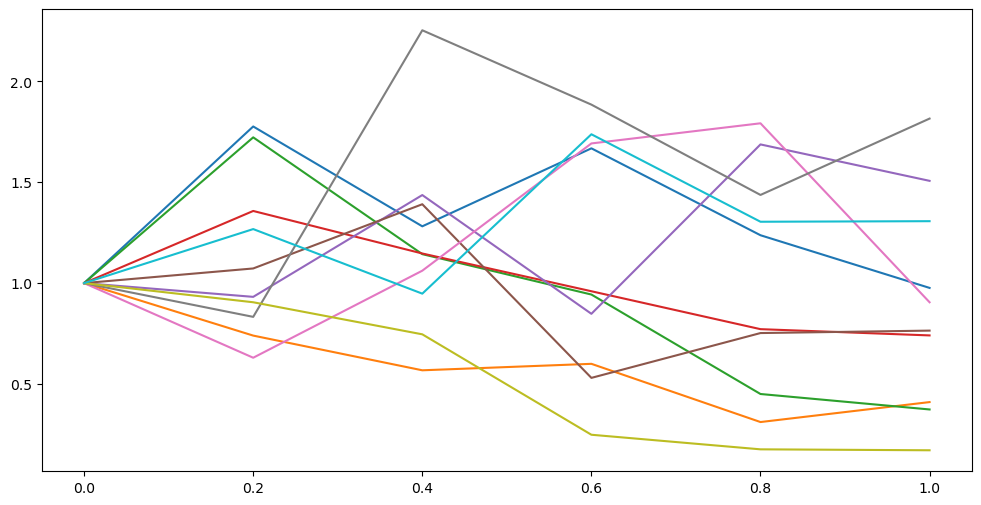

In [ ]:
plt.figure(figsize=(12,6))
for n in range(10):
    plt.plot(times, paths[n, :])

3. Basket call option with 5 underlying assets. The expected payoff of the option is given by

$$
V(s_0) = \mathbb{E}\left[e^{-rT}\left(\frac{1}{5}\sum_{i=1}^5 S^{i}(T) - K\right)^{+}\right]
$$

where for each $i\in\{1,2,3,4,5\}$, $S^{i}$ follows a Geometric Brownian motion

$$
dS^{i}(t) =S^{i}(t)(r dt +\sigma dW^{i}(t)), ~~ t>0, ~~ S_0^i = s_0
$$

with $r =0.05, ~ \sigma = 0.2, ~ T = 1, ~ s_0 =100, ~ K = 100$ and $(W^{i})_{i=1}^5$ are correlated Brownian motions with correlation matrix $\Omega$ with entries $\rho_{ij} = 0.1$ for $i\neq j$.



In [ ]:
r = 0.05
sigma =0.2
T = 1
s0 =100
K = 100
n = 5

Omega = 0.1*np.ones(n) + 0.9*np.eye(n)

First, we need to simulate 5 correlated Brownians $W^i$ from independent ones.

In [ ]:
L = np.linalg.cholesky(Omega)
Z = scipy.stats.norm.rvs(loc = 0, scale = 1, size = (n, N_sim))

W = L @ Z

print(np.cov(W))

[[0.99587301 0.09766714 0.09705761 0.10352705 0.10283242]
 [0.09766714 0.99811859 0.10550357 0.09694884 0.09875997]
 [0.09705761 0.10550357 0.9903321  0.09651212 0.0981365 ]
 [0.10352705 0.09694884 0.09651212 1.00319692 0.09677397]
 [0.10283242 0.09875997 0.0981365  0.09677397 0.99381139]]


In [ ]:
S_T = s0*np.exp((r-0.5*sigma**2)*T + sigma*np.sqrt(T)*W)

S_T.shape

(5, 100000)

In [ ]:
V_0 = np.exp(-r*T)*np.mean(np.maximum(np.mean(S_T, axis = 0) -K, 0))
V_0

7.008401103877735

In [ ]:
def V_s0(s0, r, sigma, T, Omega, Z, K):
    
    L = np.linalg.cholesky(Omega)
    
    W = L @ Z
    S_T = s0*np.exp((r-0.5*sigma**2)*T + sigma*np.sqrt(T)*W)

    V_s0 = np.exp(-r*T)*np.mean(np.maximum(np.mean(S_T, axis = 0) -K, 0))
    return V_s0


In [ ]:
N_sim = 10**5

Z1 = scipy.stats.norm.rvs(loc = 0, scale = 1, size = (n, N_sim))
Z2 = scipy.stats.norm.rvs(loc = 0, scale = 1, size = (n, N_sim))
Delta_s0 = np.logspace(-2, 0, 100)

Delta_V_ds0 = np.zeros(len(Delta_s0))
s0 = 100

for i, ds0 in enumerate(Delta_s0):
    V_plus = V_s0(s0 +ds0, r, sigma, T, Omega, Z1, K)
    V_minus = V_s0(s0 -ds0, r, sigma, T, Omega, Z2, K)
    Delta_V_ds0[i] = (V_plus - V_minus)/(2*ds0)

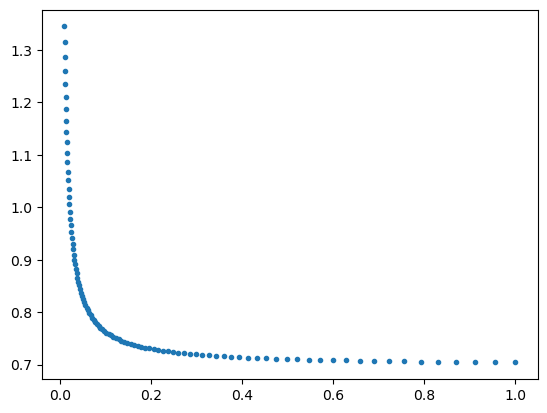

In [ ]:
plt.plot(Delta_s0, Delta_V_ds0, ".")

In [ ]:
Z = scipy.stats.norm.rvs(loc = 0, scale = 1, size = (n, N_sim))
Delta_s0 = np.logspace(-2, 0, 100)

Delta_V_ds0 = np.zeros(len(Delta_s0))
s0 = 100

for i, ds0 in enumerate(Delta_s0):
    V_plus = V_s0(s0 +ds0, r, sigma, T, Omega, Z,K)
    V_minus = V_s0(s0 -ds0, r, sigma, T, Omega, Z, K)
    Delta_V_ds0[i] = (V_plus - V_minus)/(2*ds0)

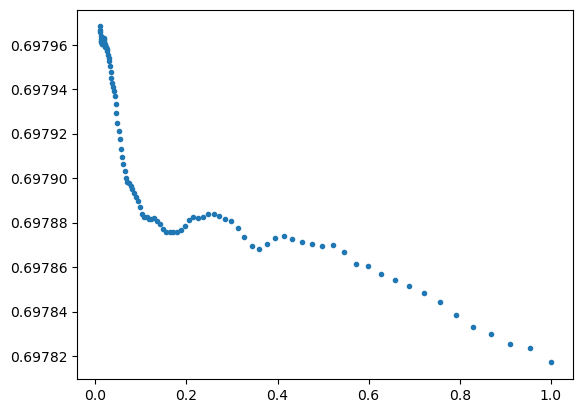

In [ ]:
plt.plot(Delta_s0, Delta_V_ds0, ".")